In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def rungekutta(differential, x, y):
    '''
    Iterative method to solve a differential equation, dy/dx. 
    Takes x and y as starting points.
    Returns the new 'y'
    '''
    
    h = 0.05 # small value of 'h' gives smaller change in 'y' along the differential.
    k1 = h * differential(x, y)
    k2 = h * differential(x + (h / 2), y + (k1 / 2))
    k3 = h * differential(x + (h / 2), y + (k2 / 2))
    k4 = h * differential(x + h, y + k3)

    y = y + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return y

In [3]:
def noyes_whitney(time, solid_drug):
    '''
    A differential of the dissolution of drug particles in a medium.
    Returns the change in mass of solid drug. This gradient is negative as the solid drug decreases.
    '''
    
    diffusity = 1
    density = 1
    diff_layer_thickness = 1
    radius = 1
    solubility = 1
    volume_of_medium = 10
    
    dissolved_drug = mass_initial - solid_drug
    
    top = 3 * diffusity * mass_initial**(1/3) * solid_drug**(2/3)
    bottom = density * diff_layer_thickness * radius
    gradient = solubility - (dissolved_drug/volume_of_medium)
    
    return -(top/bottom) * gradient

The Noyes Whitney Expression is a differential that returns the gradient in the form of -dXs/dt.

Inputing a differential into the Runge Kutta iterative method, a new value of y (solid drug) is obtained for that value of x (time).

x (time) is a pre-defined space in which to find values of y for.
Therefore, time will initially be set, in minutes, over 20 minutes range. Each new value of y will be taken after 1 minute.

In [4]:
# For one drug particle

# Set up data
time = np.arange(0, 21, 1) # Length of time for dissolution to occur.
mass_initial = 5
solid_drug = mass_initial

df = pd.DataFrame(columns=['Mass of solid drug'])

for minute in time:
    if not np.iscomplex(solid_drug): 
        df.loc[minute] = [solid_drug]
        solid_drug = rungekutta(noyes_whitney, time, solid_drug)
    else:
        solid_drug = 0

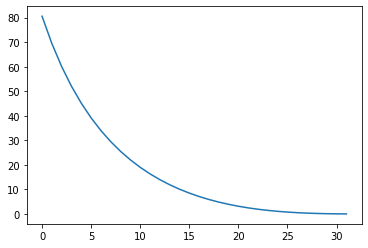

In [5]:
#For all monodisperse particles

time = np.arange(0, 31, 1)
mass_initial = 5 # This is required inside noyes_whitney
solid_drug = 5

particles = pd.DataFrame(np.random.normal(5, 0.1, 16), columns=['Particle Size'])
particles_summed = [particles.apply(sum)]

for minute in time:
    new_particles = rungekutta(noyes_whitney, time, particles)
    particles_summed.append(new_particles.apply(sum))
    particles = new_particles
    

summed_particles = pd.DataFrame(particles_summed)
plt.plot(summed_particles)


In [19]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Scatter(x=summed_particles.index, y=summed_particles['Particle Size'], mode='lines'))
fig.update_layout(
    title={
        'text':'Particle Dissolution - Noyes Whitney',
        'x':0.5,
        'y':0.85},
        xaxis_title='Mass of Solid Drug /g',
        yaxis_title='Time /min')
fig.show()